# AirBnB Seattle Data Analysis (continued)
For the Udacity Data Scientist Blog Post an analysis of dataset has to be done.
This notebook is used to analyze the data from AirBnB Seattle provided in Kaggle:

* https://www.kaggle.com/datasets/airbnb/seattle


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_cal = pd.read_csv('./data/calendar.csv')
df_list = pd.read_csv('./data/listings.csv')
df_rev = pd.read_csv('./data/reviews.csv')

# Question 2 - Is the number of reviews related to the customer satisfaction?

From question 1 we now that the customer satisfaction can be measured using `df_list["review_score_rating"]`

There is a field reviews_per_month in the "listings" dataset. We want to cross check, if this matches the actual reviews, which we get from the "reviews" dataset.

In [22]:
df_list["reviews_per_month"].count()

3191

count    3191.000000
mean        2.078919
std         1.822348
min         0.020000
25%         0.695000
50%         1.540000
75%         3.000000
max        12.150000
Name: reviews_per_month, dtype: float64

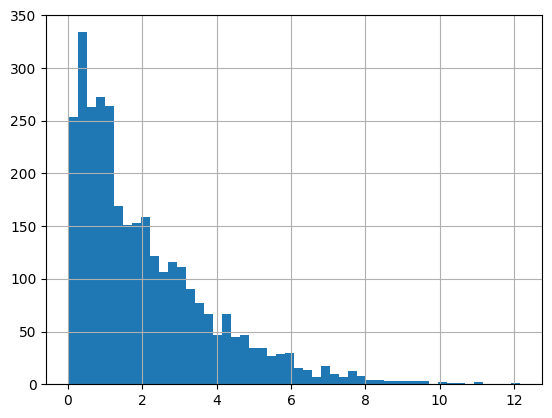

In [24]:
df_list["reviews_per_month"].hist(bins=50)
df_list["reviews_per_month"].describe()

In [32]:
reviews_per_listing = df_rev[["listing_id", "id"]].groupby("listing_id").count()
reviews_per_listing.rename(columns = {"id":"count_reviews"}, inplace=True)
reviews_per_listing

,count_reviews
listing_id,
4291,35
5682,297
6606,52
7369,40
9419,79
...,...
9995551,1
10012724,2
10020221,1


lets take a look at the distribution

,count_reviews
count,3191.000000
mean,26.590097
std,39.840788
min,1.000000
25%,4.000000
50%,13.000000
75%,31.000000
max,474.000000


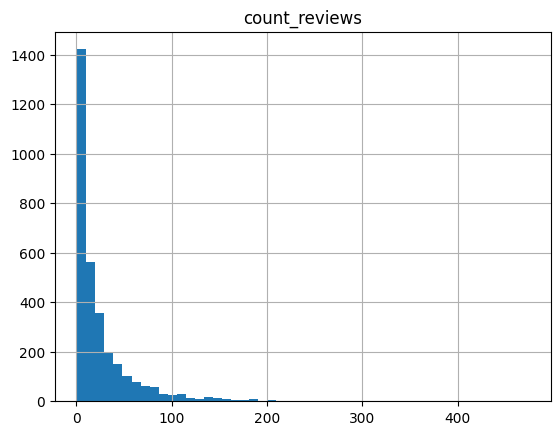

In [26]:
(reviews_per_listing).hist(bins=50)
reviews_per_listing.describe()

This means, that 50% of the listings have 13 or less reviews, but there is a max listing of 474 reviews

Now, where we have both mesures for the review, let´s check the correlation to the rating.
Therefore, we merge the values together.

In [33]:
df_merge = df_list[["id","review_scores_rating", "reviews_per_month"]].copy()
df_merge = df_merge.merge(reviews_per_listing.reset_index(names=["id"]), left_on='id', right_on='id')
df_merge = df_merge.dropna()
df_merge

,id,review_scores_rating,reviews_per_month,count_reviews
0,241032,95.0,4.07,207
1,953595,96.0,1.48,43
2,3308979,97.0,1.15,20
3,278830,92.0,0.89,38
4,5956968,95.0,2.45,17
...,...,...,...,...
3186,262764,92.0,1.56,5
3187,8578490,100.0,0.63,2
3188,3383329,96.0,4.01,73
3189,8101950,80.0,0.30,1


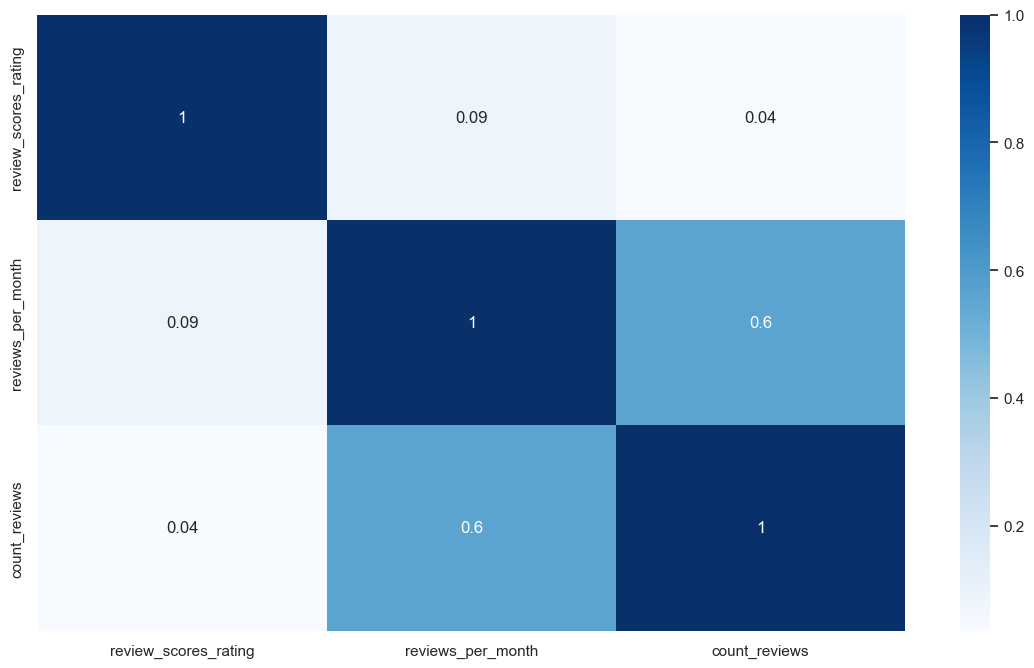

In [34]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df_merge.drop(["id"], axis=1).corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [ ]:
Huh, this was also unexpected. 
reviews_per_month are not as strong correlated to count_reviews, as I thought. I expected those values to be nearly linear equal.
This might be another analysis ouside of question 2.

But for Question 2 it does not matter, because for both correlations we have an

# Result

The number of reviews does not change significant with the customer satisfaction. So, bad ratings have the same amount of reviews as good ratings.